# Домашнє завдання №11

# Частина №1. Рекурентна нейронна мережа RNN

In [132]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D      

### Встановлення гіперпараметрів:

In [217]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

### Завантаження даних:

In [219]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

### Передпроцесинг послідовних даних:

In [221]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

### Побудова моделі

In [223]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


### Компіляція моделі

In [227]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


### Навчання моделі

In [229]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 [==============================] - 24s 325ms/step - loss: 0.6715 - acc: 0.5774 - val_loss: 0.6116 - val_acc: 0.6807
Epoch 2/10
69/69 [==============================] - 22s 322ms/step - loss: 0.5116 - acc: 0.7639 - val_loss: 0.6519 - val_acc: 0.6548
Epoch 3/10
69/69 [==============================] - 23s 337ms/step - loss: 0.4085 - acc: 0.8302 - val_loss: 0.4028 - val_acc: 0.8267
Epoch 4/10
69/69 [==============================] - 22s 325ms/step - loss: 0.3395 - acc: 0.8625 - val_loss: 0.3383 - val_acc: 0.8627
Epoch 5/10
69/69 [==============================] - 23s 328ms/step - loss: 0.3011 - acc: 0.8803 - val_loss: 0.3867 - val_acc: 0.8255
Epoch 6/10
69/69 [==============================] - 22s 322ms/step - loss: 0.2680 - acc: 0.8957 - val_loss: 0.3538 - val_acc: 0.8479
Epoch 7/10
69/69 [==============================] - 22s 320ms/step - loss: 0.2422 - acc: 0.9068 - val_loss: 0.3829 - val_acc: 0.8400
Epoch 8/10
69/69 [==============================] - 25s 358ms/step - 

### Візуалізація результатів

In [231]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
    plt.title('Точність тренування і валідації')  
    plt.legend()  

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  
    plt.title('Втрати тренування і валідації')  
    plt.legend()  

    plt.show()  


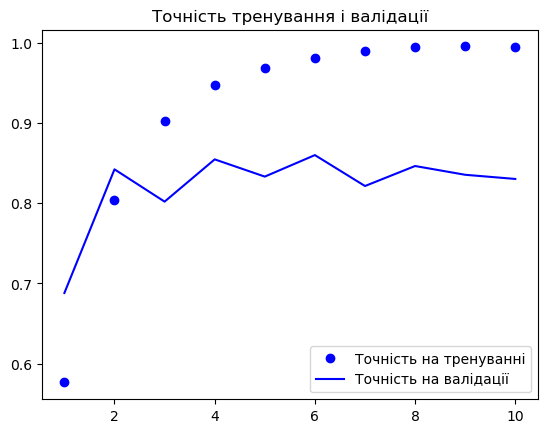

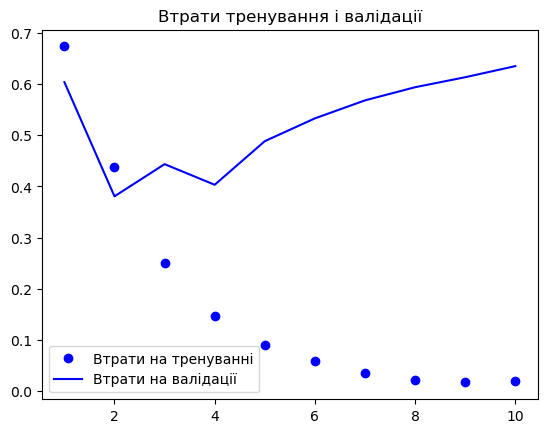

In [213]:
visualisation(history)

### Використання моделі

In [155]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))


In [233]:
prediction(model)

782/782 [==============================] - 17s 22ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 17s 22ms/step - loss: 0.4263 - acc: 0.8590
Test Loss: 0.4263213276863098
Test Accuracy: 0.858959972858429


# Частина №2. Побудова моделі LSTM

In [61]:
from keras.layers import LSTM

In [241]:
model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [244]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_8 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
69/69 [==============================] - 134s 2s/step - loss: 0.6885 - acc: 0.5480 - val_loss: 0.6563 - val_acc: 0.5805
Epoch 2/10
69/69 [==============================] - 142s 2s/step - loss: 0.5416 - acc: 0.7453 - val_loss: 0.5604 - val_acc: 0.7032
Epoch 3/10
69/69 [==============================] - 152s 2s/step - loss: 0.3966 - acc: 0.8306 - val_loss: 0.3999 - val_acc: 0.8291
Epoch 4/10
69/69 [==============================] - 155s 2s/step - loss: 0.3174 - acc: 0.8735 - val_loss: 0.3474 - val_acc: 0.8531
Epoch 5/10
69/69 [==============================] - 163s 2s/step - loss: 0.2833 - acc: 0.8896 - val_loss: 0.3163 - val_acc: 0.8643
Epoch 6/10
69/69 [==============================] - 162s 2s/step - loss: 0.2540 - acc: 0.9025 - val_loss: 0.3043 - val_acc: 0.8763
Epoch 7/10
69/69 [==============================] - 169s 2s/step - loss: 0.2315 - acc: 0.9127 - val_loss: 0.2865 - val_acc: 0.8811
Epoch 8/10
69/69 [==============================] - 172s 2s/step - loss: 0.2091 - a

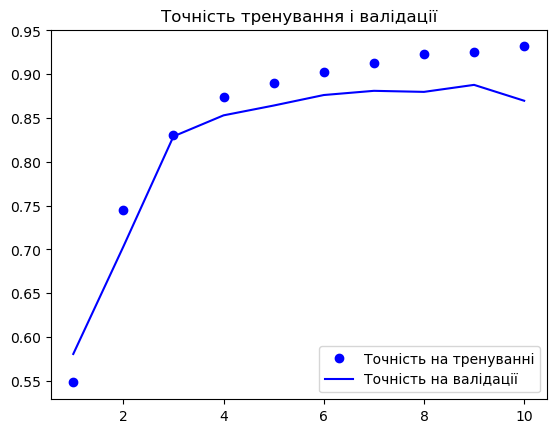

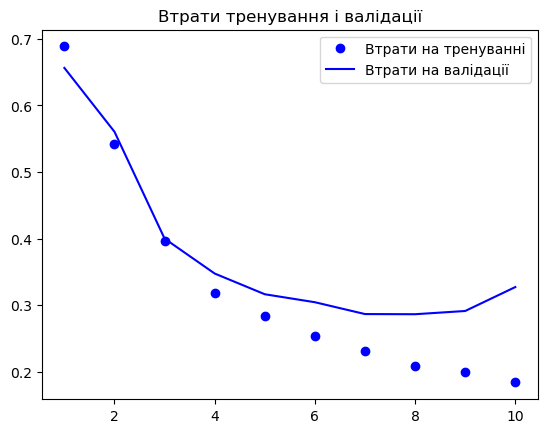

In [246]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

### Прогнозування з використанням навченої моделі

In [250]:
prediction(model2)

782/782 [==============================] - 56s 71ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 59s 75ms/step - loss: 0.3443 - acc: 0.8618
Test Loss: 0.34433165192604065
Test Accuracy: 0.8618000149726868


# Частина №3. Побудова моделі BRNN

In [83]:
from keras.layers import Bidirectional

In [262]:
model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [264]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_10 (Spat  (None, 500, 32)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
69/69 [==============================] - 312s 4s/step - loss: 0.6911 - acc: 0.5381 - val_loss: 0.6853 - val_acc: 0.5177
Epoch 2/10
69/69 [==============================] - 311s 5s/step - loss: 0.5773 - acc: 0.7154 - val_loss: 0.5097 - val_acc: 0.7548
Epoch 3/10
69/69 [==============================] - 308s 4s/step - loss: 0.4254 - acc: 0.8178 - val_loss: 0.4326 - val_acc: 0.8095
Epoch 4/10
69/69 [==============================] - 311s 5s/step - loss: 0.3514 - acc: 0.8559 - val_loss: 0.3197 - val_acc: 0.8709
Epoch 5/10
69/69 [==============================] - 335s 5s/step - loss: 0.2974 - acc: 0.8837 - val_loss: 0.3067 - val_acc: 0.8744
Epoch 6/10
69/69 [==============================] - 516s 8s/step - loss: 0.2565 - acc: 0.9013 - val_loss: 0.3203 - val_acc: 0.8803
Epoch 7/10
69/69 [==============================] - 303s 4s/step - loss: 0.2365 - acc: 0.9114 - val_loss: 0.3415 - val_acc: 0.8596
Epoch 8/10
69/69 [==============================] - 553s 8s/step - loss: 0.2134 - a

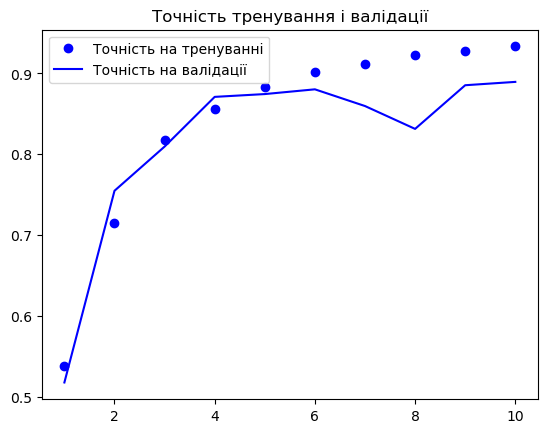

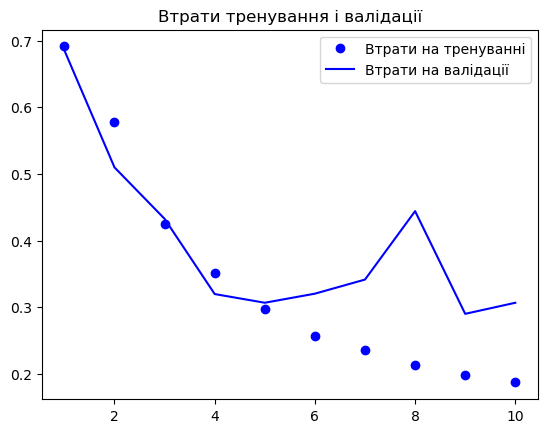

In [266]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

### Прогнозування з використанням навченої моделі

In [270]:
prediction(model3)

782/782 [==============================] - 76s 94ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 78s 100ms/step - loss: 0.3307 - acc: 0.8775
Test Loss: 0.33068132400512695
Test Accuracy: 0.8775200247764587


# Частина №4. Побудова моделі DRNN

In [285]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [287]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_15 (Spat  (None, 500, 32)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_9 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                24832     
 ional)                                                          
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                     

Epoch 1/10
69/69 [==============================] - 1788s 26s/step - loss: 0.6924 - acc: 0.5198 - val_loss: 0.6897 - val_acc: 0.5493
Epoch 2/10
69/69 [==============================] - 1858s 27s/step - loss: 0.5789 - acc: 0.6897 - val_loss: 0.4298 - val_acc: 0.8120
Epoch 3/10
69/69 [==============================] - 1504s 22s/step - loss: 0.3911 - acc: 0.8320 - val_loss: 0.3550 - val_acc: 0.8509
Epoch 4/10
69/69 [==============================] - 1157s 17s/step - loss: 0.3153 - acc: 0.8719 - val_loss: 0.3102 - val_acc: 0.8709
Epoch 5/10
69/69 [==============================] - 1424s 21s/step - loss: 0.2666 - acc: 0.8959 - val_loss: 0.3226 - val_acc: 0.8636
Epoch 6/10
69/69 [==============================] - 1188s 17s/step - loss: 0.2328 - acc: 0.9133 - val_loss: 0.4203 - val_acc: 0.8556
Epoch 7/10
69/69 [==============================] - 1252s 18s/step - loss: 0.2175 - acc: 0.9169 - val_loss: 0.5028 - val_acc: 0.8085
Epoch 8/10
69/69 [==============================] - 1239s 18s/step - 

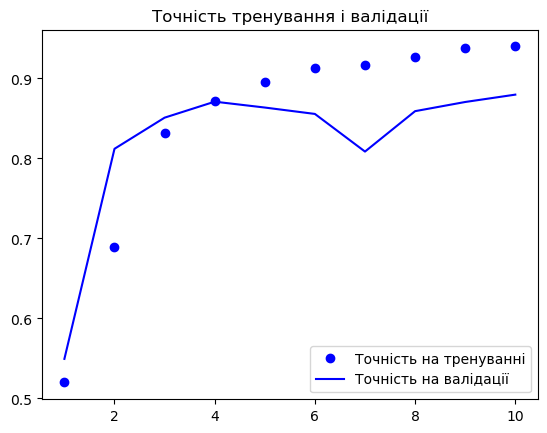

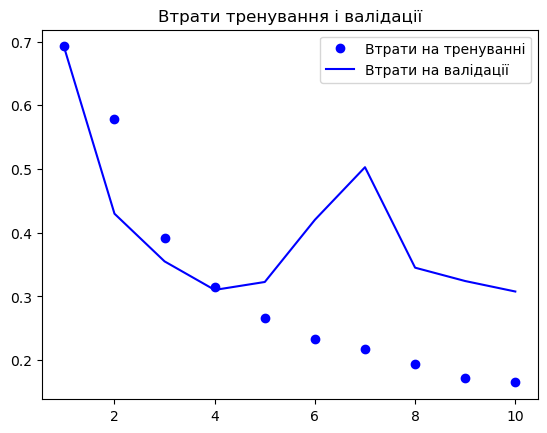

In [289]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

### Прогнозування з використанням навченої моделі

In [292]:
prediction(model4)

782/782 [==============================] - 111s 139ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 118s 150ms/step - loss: 0.3264 - acc: 0.8724
Test Loss: 0.32638588547706604
Test Accuracy: 0.8723599910736084


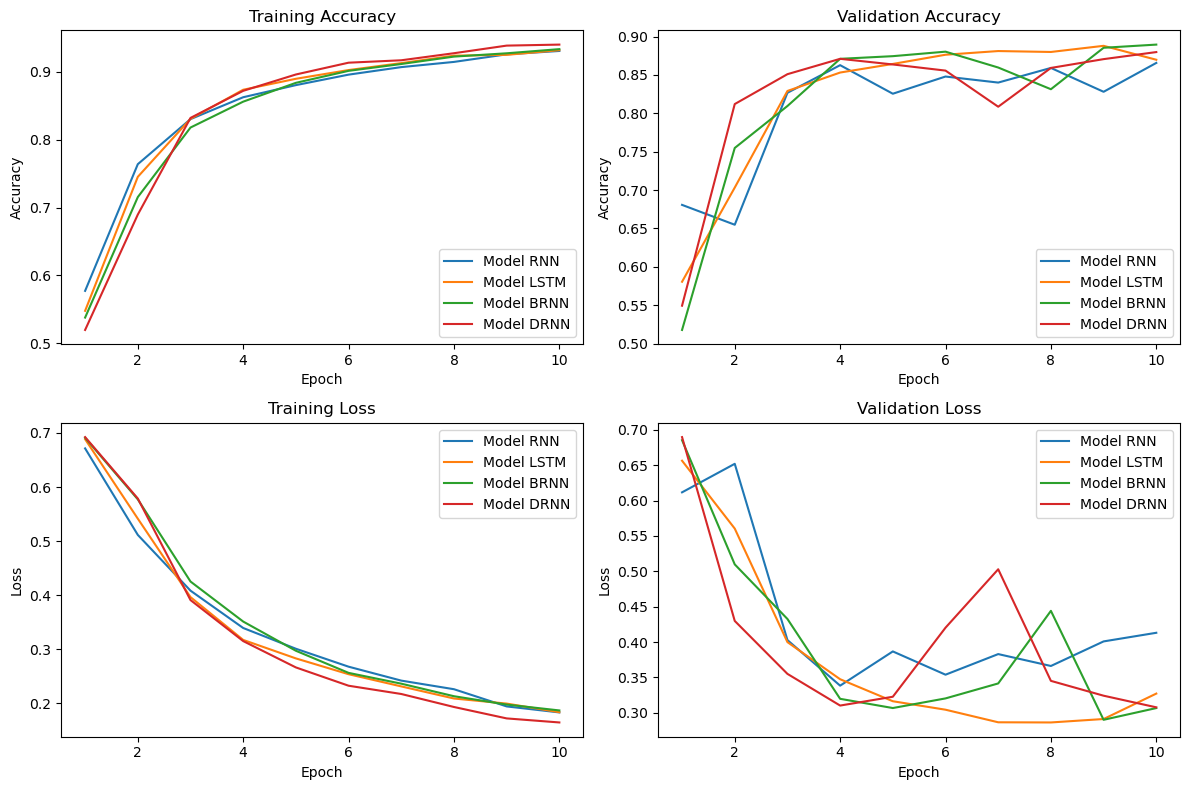

In [294]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Висновки:
Ми побудували 4 моделі, показники яких на тестових даних подані у таблиці:

| Модель | Точність |  Втрати  |
|--------|----------|----------|
|RNN     |  85.90%  |  42.63%  |
|LSTM    |  86.18%  |  34.43%  |
|BRNN    |  87.75%  |  33.07%  |
|DBRR    |  87.24%  |  32.64%  |
Кожна наступна модель на тестових даних показала кращу точність, окрім глибокої RNN. Треба зазначити, що кожна наступна модель тренувалася довше за попередні. Найдовше, відповідно, навчалася остання модель - DRNN, при цьому не давши покращення точності передбачення. Найстабільнішою на валідаційних даних виявилася модель LSTM. Для неї оптимальною була б кількість епох 9.
